In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload cleaned dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv("titanic_cleaned.csv")

# Display first 5 rows
df.head()


Saving titanic_cleaned.csv to titanic_cleaned (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
# Convert categorical features into numeric
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [6]:
# Drop non-numeric columns before correlation
df_numeric = df_encoded.select_dtypes(include=['number'])

# Compute correlation with target variable
corr = df_numeric.corr()

# Sort correlation values with respect to Survived
corr_target = corr['Survived'].sort_values(ascending=False)
corr_target



,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.106811
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.069809
Pclass,-0.338481


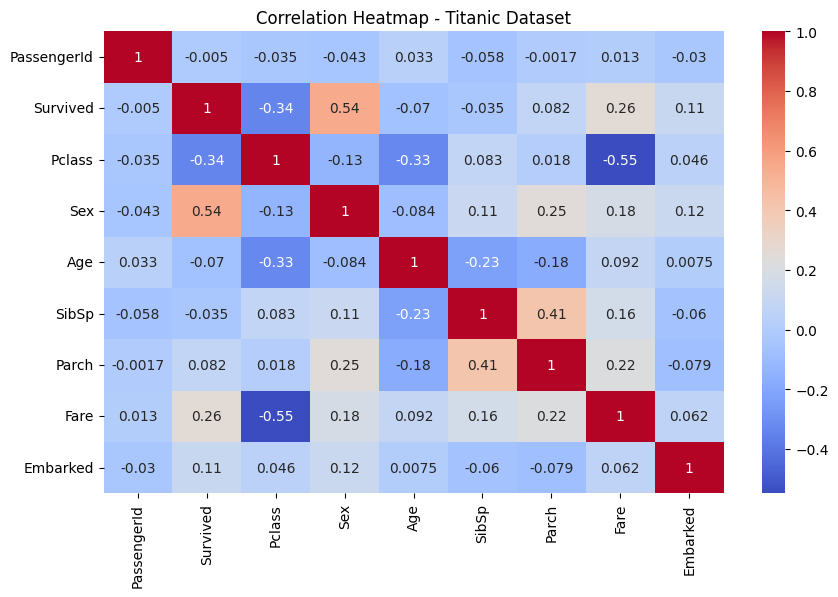

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()
